# **Kaggle Playground Series - Season 5, Episode 2**

## **Objective**  
In this episode we are given the task of predict the price of backpacks given various attributes.

## **Data**  
The dataset for this competition is generated from a deep learning model trained on the [Student Bag Pric Preditions Dateset](https://www.kaggle.com/datasets/souradippal/student-bag-price-prediction-dataset/data)


In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print('Libaires imported')

Libaires imported


In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s5e2/train.csv')
df_train_ex = pd.read_csv('/kaggle/input/playground-series-s5e2/training_extra.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s5e2/test.csv')
df_sub = pd.read_csv('/kaggle/input/playground-series-s5e2/sample_submission.csv')
print('Data imported')

Data imported


### **Initial Observations**  


In [3]:
df_test

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg)
0,300000,Puma,Leather,Small,2.0,No,No,Tote,Green,20.671147
1,300001,Nike,Canvas,Medium,7.0,No,Yes,Backpack,Green,13.564105
2,300002,Adidas,Canvas,Large,9.0,No,Yes,Messenger,Blue,11.809799
3,300003,Adidas,Nylon,Large,1.0,Yes,No,Messenger,Green,18.477036
4,300004,NaN,Nylon,Large,2.0,Yes,Yes,Tote,Black,9.907953
...,...,...,...,...,...,...,...,...,...,...
199995,499995,Adidas,Canvas,Large,2.0,Yes,No,Messenger,Red,7.383498
199996,499996,Nike,Polyester,Small,9.0,No,Yes,Messenger,Pink,6.058394
199997,499997,Jansport,Nylon,Small,9.0,No,Yes,Tote,Green,26.890163
199998,499998,Puma,Nylon,Large,10.0,Yes,No,Tote,Gray,25.769153


In [4]:
df_train

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
299995,299995,Adidas,Leather,Small,9.0,No,No,Tote,Blue,12.730812,129.99749
299996,299996,Jansport,Leather,Large,6.0,No,Yes,Tote,Blue,26.633182,19.85819
299997,299997,Puma,Canvas,Large,9.0,Yes,Yes,Backpack,Pink,11.898250,111.41364
299998,299998,Adidas,Nylon,Small,1.0,No,Yes,Tote,Pink,6.175738,115.89080


In [5]:
df_train_ex

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
1,500001,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
2,500002,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
3,500003,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
4,500004,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461
...,...,...,...,...,...,...,...,...,...,...,...
3694313,4194313,Nike,Canvas,NaN,3.0,Yes,Yes,Messenger,Blue,28.098120,104.74460
3694314,4194314,Puma,Leather,Small,10.0,Yes,Yes,Tote,Blue,17.379531,122.39043
3694315,4194315,Jansport,Canvas,Large,10.0,No,No,Backpack,Red,17.037708,148.18470
3694316,4194316,Puma,Canvas,NaN,2.0,No,No,Backpack,Gray,28.783339,22.32269


In [6]:
df_train_combined = pd.concat([df_train, df_train_ex], ignore_index=True)

In [7]:
df_train_combined

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
3994313,4194313,Nike,Canvas,NaN,3.0,Yes,Yes,Messenger,Blue,28.098120,104.74460
3994314,4194314,Puma,Leather,Small,10.0,Yes,Yes,Tote,Blue,17.379531,122.39043
3994315,4194315,Jansport,Canvas,Large,10.0,No,No,Backpack,Red,17.037708,148.18470
3994316,4194316,Puma,Canvas,NaN,2.0,No,No,Backpack,Gray,28.783339,22.32269


In [8]:
df_train = df_train_combined

### **Summary of Datasets**

In [9]:
missing_values_train = pd.DataFrame({'Feature': df_train.columns,
                              '[TRAIN] No. of Missing Values': df_train.isnull().sum().values,
                              '[TRAIN] % of Missing Values': ((df_train.isnull().sum().values)/len(df_train)*100)})

missing_values_test = pd.DataFrame({'Feature': df_test.columns,
                             '[TEST] No.of Missing Values': df_test.isnull().sum().values,
                             '[TEST] % of Missing Values': ((df_test.isnull().sum().values)/len(df_test)*100)})

unique_values = pd.DataFrame({'Feature': df_train.columns,
                              'No. of Unique Values[FROM TRAIN]': df_train.nunique().values})

feature_types = pd.DataFrame({'Feature': df_train.columns,
                              'DataType': df_train.dtypes})

df_summary = pd.merge(missing_values_train, missing_values_test, on='Feature', how='left')
df_summary = pd.merge(df_summary, unique_values, on='Feature', how='left')
df_summary = pd.merge(df_summary, feature_types, on='Feature', how='left')

df_summary

,Feature,[TRAIN] No. of Missing Values,[TRAIN] % of Missing Values,[TEST] No.of Missing Values,[TEST] % of Missing Values,No. of Unique Values[FROM TRAIN],DataType
0,id,0,0.000000,0.0,0.0000,3994318,int64
1,Brand,126758,3.173458,6227.0,3.1135,5,object
2,Material,110962,2.777996,5613.0,2.8065,4,object
3,Size,87785,2.197747,4381.0,2.1905,3,object
4,Compartments,0,0.000000,0.0,0.0000,10,float64
5,Laptop Compartment,98533,2.466829,4962.0,2.4810,2,object
6,Waterproof,94324,2.361454,4811.0,2.4055,2,object
7,Style,104180,2.608205,5153.0,2.5765,3,object
8,Color,133617,3.345177,6785.0,3.3925,6,object
9,Weight Capacity (kg),1808,0.045264,77.0,0.0385,1920345,float64


In [10]:
train_duplicates = df_train.duplicated().sum()
test_duplicates = df_test.duplicated().sum()

print(f"Number of duplicate rows in df_train: {train_duplicates}")
print(f"Number of duplicate rows in df_test: {test_duplicates}")

Number of duplicate rows in df_train: 0
Number of duplicate rows in df_test: 0


## **Dataset Observations**

### **Shape**
Training Data: 3,994,318rows × 11 columns  
Test Data: 200,000 rows × 10 columns

### **Missing Values**
Several features contain missing values in both the training and test sets:  

**Training set**
- Brand: ~3.17%
- Material:  ~2.78%
- Size: ~2.20%
- Laptop Compartment: ~2.47%
- Waterproof: ~2.36%
- Style: ~2.61%
- Color: ~3.35%
- Weight Capacity (kg): ~0.05%

**Test set**
- Brand: ~3.11%
- Material: ~2.81%
- Size: ~2.19%
- Laptop Compartment: ~2.48%
- Waterproof: ~2.41%
- Style: ~2.58%
- Color: ~3.39%
- Weight Capacity (kg): ~0.04%


### **Feature Breakdown**

- **ID:** A unique identifier for each backpack.
- **Brand, Material, Size, Style:** Categorical variables.
- **Compartments:** Numeric, range from 1 to 10.
- **Laptop Compartment & Waterproof:** Binary categorical.
- **Color:** 6 unique values, with missing data.
- **Weight Capacity (kg):** Numerical.
- **Price:** The target variable in the training set.

## **EDA**

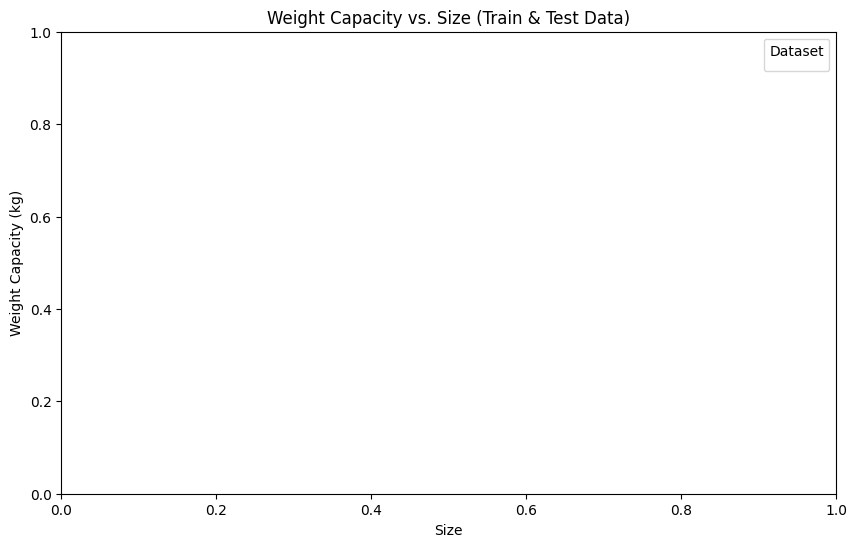

In [11]:
df_train["Dataset"] = "Train"
df_test["Dataset"] = "Test"
combined_df = pd.concat([df_train, df_test], axis=0)

combined_df["Weight Capacity (kg)"] = pd.to_numeric(combined_df["Weight Capacity (kg)"], errors="coerce")
combined_df["Size"] = pd.to_numeric(combined_df["Size"], errors="coerce")

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=combined_df,
    x="Size",
    y="Weight Capacity (kg)",
    hue="Dataset",
    alpha=0.5
)
plt.xlabel("Size")
plt.ylabel("Weight Capacity (kg)")
plt.title("Weight Capacity vs. Size (Train & Test Data)")
plt.legend(title="Dataset")
plt.show()
